In [1]:
import numpy as np
import keras
from keras.datasets import mnist

In [2]:
import matplotlib.pyplot as plt
from keras.utils import to_categorical


## Data Loading and analysis

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
def class_distribution(arr):
    values, counts = np.unique(arr, return_counts=True)
    percentages = (counts / len(arr)) * 100
    
    for value, count, percentage in zip(values, counts, percentages):
        print(f"{value} : {count} : {percentage:.2f}%")

In [7]:
class_distribution(y_train)

0 : 5923 : 9.87%
1 : 6742 : 11.24%
2 : 5958 : 9.93%
3 : 6131 : 10.22%
4 : 5842 : 9.74%
5 : 5421 : 9.04%
6 : 5918 : 9.86%
7 : 6265 : 10.44%
8 : 5851 : 9.75%
9 : 5949 : 9.92%


In [8]:
class_distribution(y_test)

0 : 980 : 9.80%
1 : 1135 : 11.35%
2 : 1032 : 10.32%
3 : 1010 : 10.10%
4 : 982 : 9.82%
5 : 892 : 8.92%
6 : 958 : 9.58%
7 : 1028 : 10.28%
8 : 974 : 9.74%
9 : 1009 : 10.09%


In [9]:
def visualise_dataset(i):
    img = x_train[i]
    img = img.reshape((28,28))
    plt.imshow(img,cmap='gray')
    plt.title(y_train[i])
    plt.axis("off")
    plt.show()

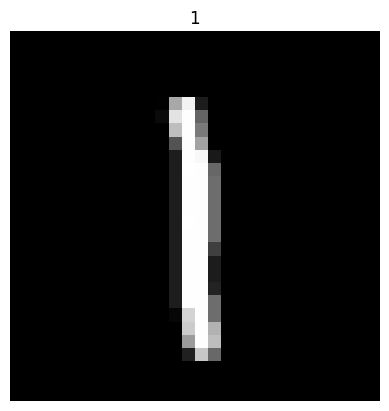

In [10]:
visualise_dataset(14)

## Data Preprocess

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
img_rows, img_cols=28, 28

In [13]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
inpx = (img_rows, img_cols, 1)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [15]:
x_train /= 255
x_test /= 255

In [16]:
y_train = to_categorical(y_train, num_classes=10)

In [17]:
y_test = to_categorical(y_test, num_classes=10)

In [18]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=2)

## Data Augmentation

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [20]:
augmentation = ImageDataGenerator(
    rotation_range=5,
    zoom_range = 0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False # Due to 6 & 9
)

In [21]:
augmentation.fit(x_train)

## Model Build

In [22]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam

In [23]:
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'),
    MaxPool2D(pool_size=(2,2), strides=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

In [24]:
optimizer = Adam(learning_rate=0.001)

In [25]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

## Maodel Training

In [26]:
epochs = 16
batch_size = 500

In [27]:
results = model.fit(augmentation.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val))

Epoch 1/16


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.4184 - loss: 1.6774 - val_accuracy: 0.9332 - val_loss: 0.2861
Epoch 2/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8150 - loss: 0.5747 - val_accuracy: 0.9572 - val_loss: 0.1462
Epoch 3/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8817 - loss: 0.3751 - val_accuracy: 0.9670 - val_loss: 0.1073
Epoch 4/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9087 - loss: 0.2899 - val_accuracy: 0.9730 - val_loss: 0.0886
Epoch 5/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9197 - loss: 0.2580 - val_accuracy: 0.9758 - val_loss: 0.0762
Epoch 6/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9277 - loss: 0.2341 - val_accuracy: 0.9760 - val_loss: 0.0712
Epoch 7/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.9363 - loss: 0.2084 - val_accuracy: 0.9787 - val_loss: 0.0652
Epoch 8/16
108/108 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.9396 - loss: 0.1913 - val_accuracy: 0.979

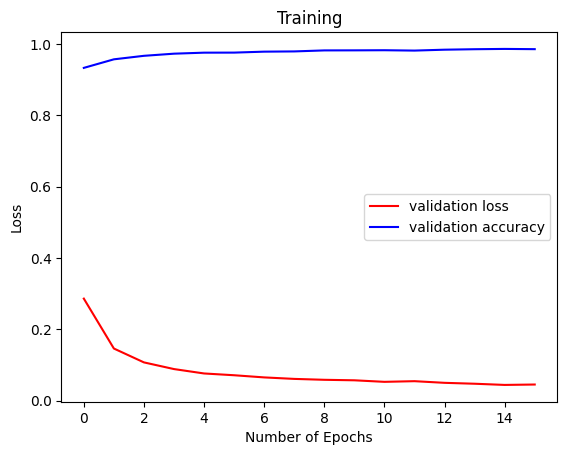

In [28]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(results.history['val_loss'], color='r', label="validation loss")
plt.plot(results.history['val_accuracy'], color='b', label="validation accuracy")
plt.title("Training")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Model Evaluation

In [29]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report,confusion_matrix

In [30]:
y_pre_classes = model.predict(x_test).argmax(axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [31]:
accuracy_score(y_test_classes, y_pre_classes)

0.9885

In [32]:
print(classification_report(y_test_classes, y_pre_classes))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [33]:
accuracy = accuracy_score(y_test_classes, y_pre_classes)
f1 = f1_score(y_test_classes, y_pre_classes, average='weighted')
precision = precision_score(y_test_classes, y_pre_classes, average='weighted')
recall = recall_score(y_test_classes, y_pre_classes, average='weighted')

In [34]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9885
F1-score: 0.9885
Precision: 0.9885
Recall: 0.9885


In [35]:
cm = confusion_matrix(y_test_classes, y_pre_classes)

In [36]:
import seaborn as sns

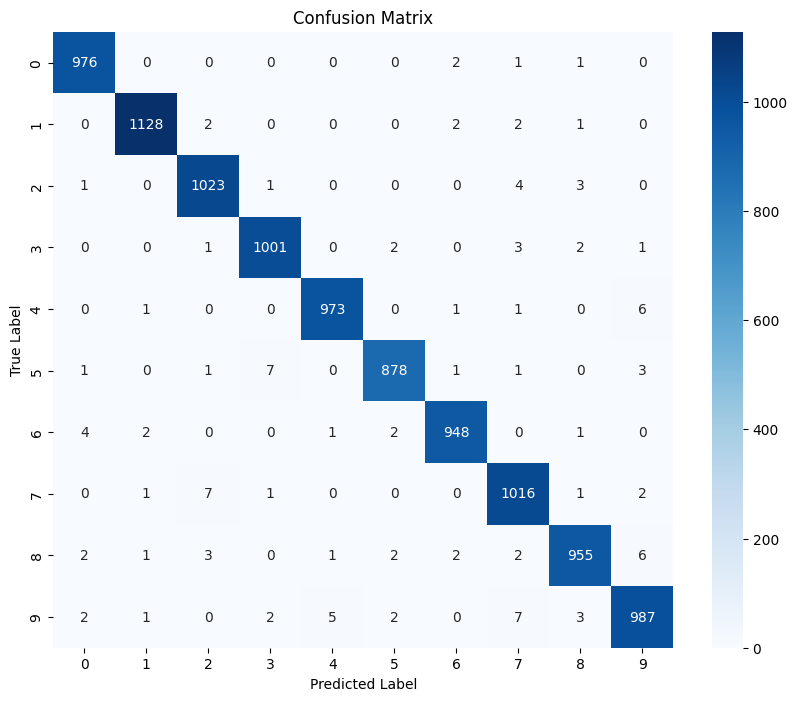

In [37]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

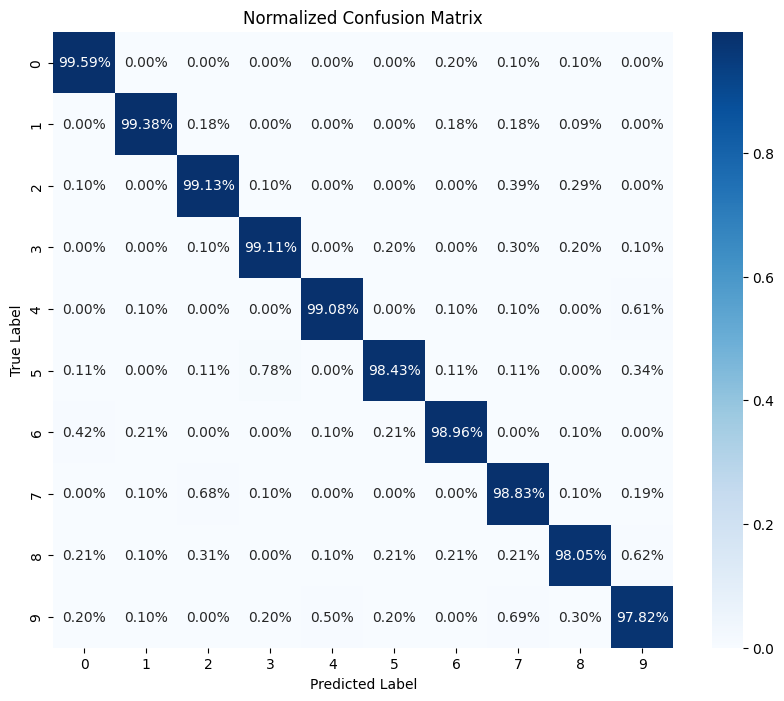

In [38]:
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt='.2%', cmap='Blues')
plt.title('Normalized Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [42]:
model.save('mnist_cnn.keras')

In [ ]:
import sagemaker
from sagemaker.tensorflow import TensorFlowModel

# Package your model
model_data = sagemaker.utils.s3_path_join(
    "s3://your-bucket", "mnist_model", "mnist_cnn.keras"
)

# Create SageMaker model
sagemaker_model = TensorFlowModel(
    model_data=model_data,
    role="your-sagemaker-role-arn",
    framework_version="2.12.0"
)

# Deploy model
predictor = sagemaker_model.deploy(
    initial_instance_count=1,
    instance_type="ml.t2.medium"
)